# SPAM Detection Model using Natural Language Processing

* Natural Language Processing, which basically consists of combining machine learning techniques with text, and using math and statistics to get that text in a format that the machine learning algorithms can understand!

* Using same we will detect spam messages from SMSSpamCollection dataset and train and evaluate the model to predict a message to be spam or not.

* Here we will first create the clasis model all by ourself and then later will go to Sklearn's built in Pipeline Feature which helps in NLP and then later compare accuracy of Pipeline model with Random Forest Model

In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> storewords


    Error loading storewords: Package 'storewords' not found in index



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> stopwords
Command 'stopwords' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WS

        C:\Users\conne\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [3]:
messages = [line.rstrip() for line in open ('smsspamcollection/SMSSpamCollection')]

In [4]:
print(len(messages))

5574


In [5]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [6]:
messages[100]

"ham\tPlease don't text me anymore. I have nothing else to say."

In [4]:
for mess_no,messages in enumerate(messages[:10]):
    print(mess_no,messages)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [5]:
import pandas as pd

In [6]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [7]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [10]:
messages['length'] = messages['message'].apply(len)

In [11]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

<AxesSubplot:ylabel='Frequency'>

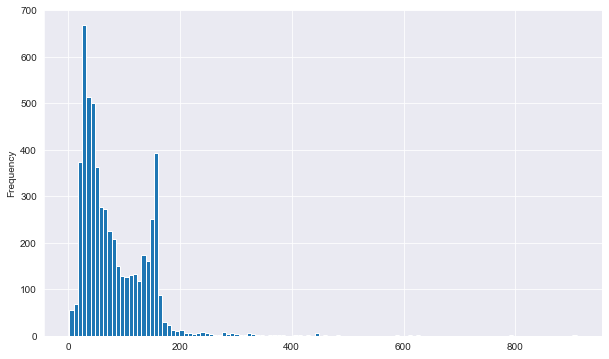

In [13]:
plt.figure(figsize=(10,6))
messages['length'].plot.hist(bins=120)

In [14]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [15]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

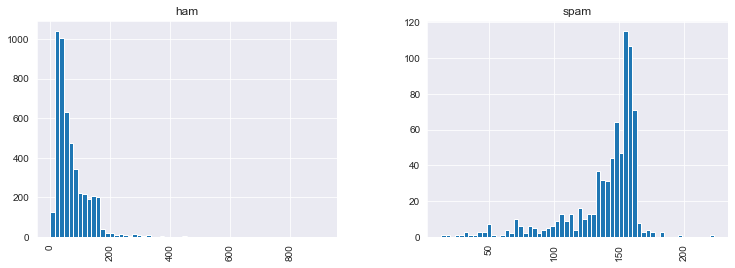

In [16]:
messages.hist(column='length',by='label',bins=60,figsize=(12,4))

In [17]:
import string

In [18]:
from nltk.corpus import stopwords

In [19]:
mess = 'Sample message ! Notice: it has punctuations.'

In [20]:
nopunc = [c for c in mess if c not in string.punctuation]

In [21]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n',
 's']

In [22]:
nopunc = ''.join(nopunc)

In [23]:
nopunc

'Sample message  Notice it has punctuations'

In [24]:
x = ['a','b','c','d','e']

In [25]:
x

['a', 'b', 'c', 'd', 'e']

In [26]:
''.join(x)

'abcde'

In [27]:
'=='.join(x)

'a==b==c==d==e'

In [28]:
nopunc

'Sample message  Notice it has punctuations'

In [29]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuations']

In [30]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [31]:
 clean_mess

['Sample', 'message', 'Notice', 'punctuations']

In [32]:
# creating a function

def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [33]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [34]:
messages['message'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [35]:
messages['message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

# vectorization

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [38]:
print(len(bow_transformer.vocabulary_))

11425


In [39]:
mess4 = messages['message'][3]

In [40]:
print(mess4)

U dun say so early hor... U c already then say...


In [41]:
#bag of word
bow4 = bow_transformer.transform([mess4])

In [42]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [43]:
bow4.shape

(1, 11425)

In [44]:
# to check which word occoured twice
bow_transformer.get_feature_names()[4068]

'U'

In [45]:
bow_transformer.get_feature_names()[9554]

'say'

In [47]:
messages_bow = bow_transformer.transform(messages['message'])

In [48]:
print('Shape of Sparse Matrix is :', messages_bow.shape)

Shape of Sparse Matrix is : (5572, 11425)


In [50]:
messages_bow.nnz     # gives the number of non-zero messages

50548

In [52]:
# formula to find out the occurrence of number of non-zeros messages to total number of messages

sparsity = (100.0 * messages_bow.nnz/(messages_bow.shape[0]*messages_bow.shape[1]))
print('Sparsity :{}'.format((sparsity)))

Sparsity :0.07940295412668218


#### TfidTransformer

In [53]:
from sklearn.feature_extraction.text import TfidfTransformer

In [54]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [55]:
tfidf4 = tfidf_transformer.transform(bow4)

In [56]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [58]:
# let's suppose we want to check the documneted frequency of word "university"

tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [59]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [61]:
from sklearn.naive_bayes import MultinomialNB     # Multi Nomial Naive Bayes Theorem

In [64]:
# creating spam detection model
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [66]:
# prediction tfidf4
spam_detect_model.predict(tfidf4)[0]

'ham'

In [67]:
# predicting all messages

all_predict = spam_detect_model.predict(messages_tfidf)

In [68]:
all_predict

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

* We have the prediction of all messages of being it spam or not .
* In this was we are going to get 100% accuracy but it will take much more time for model building .
* Sklearn has pipeline feature which makes the job easier .

In [69]:
from sklearn.model_selection import train_test_split

In [71]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['label'],test_size=0.3)

### PIPELINE

In [72]:
from sklearn.pipeline import Pipeline

In [77]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

In [78]:
pipeline.fit(msg_train,y=label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002C2D3C54310>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [83]:
predictions = pipeline.predict(msg_test)

### checking accuracy of pipeline model

In [84]:
from sklearn.metrics import classification_report,confusion_matrix

In [85]:
print(classification_report(label_test,predictions))
print('\n')
print(confusion_matrix(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1445
        spam       1.00      0.68      0.81       227

    accuracy                           0.96      1672
   macro avg       0.98      0.84      0.89      1672
weighted avg       0.96      0.96      0.95      1672



[[1445    0]
 [  73  154]]


we get an average accuracy of 96%

##  Now let's check the same spam detection model using Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier',RandomForestClassifier()),
])

In [88]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002C2D3C54310>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [89]:
predict = pipeline.predict(msg_test)

In [90]:
print(classification_report(label_test,predict))
print('\n')
print(confusion_matrix(label_test,predict))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1445
        spam       1.00      0.77      0.87       227

    accuracy                           0.97      1672
   macro avg       0.98      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672



[[1445    0]
 [  52  175]]


Random Forest is giving us an accuracy of 97% for the spam detection model

#### Hence, We successfully completed building the spam detection model using Natural Language Processing